In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [54]:
import lasio # library to read welllogdata

In [55]:
!git clone https://github.com/Abhishek668/Machine-Learning-Models


fatal: destination path 'Machine-Learning-Models' already exists and is not an empty directory.


In [56]:
import sys
sys.path.append(' https://github.com/Abhishek668/Machine-Learning-Models')

In [57]:
from label_generator import label_generator
from triple_combo import triple_combo
from ND_plot import ND_plot
from well_log_display import well_log_display

In [58]:
def calculate_klogh(formation_name, phif, vsh):
  # there is no available equation for Heather Fm. 
  if formation_name == 'hugin': # hugin= formtion name
    return 10 ** (2 + (8 * phif) - (9 * vsh))
  if formation_name == 'sleipner':
    return 10 ** (-3 + (32 * phif) - (2 * vsh))
  if formation_name == 'skagerak':
    return 10 ** (-1.85 + (17.4 * phif) - (3 * vsh))

In [59]:
filepath = '15_9-F-11A.LAS.txt'

# read with lasio
well = lasio.read(filepath)

In [60]:
well.keys()

['DEPTH',
 'ABDCQF01',
 'ABDCQF02',
 'ABDCQF03',
 'ABDCQF04',
 'BS',
 'CALI',
 'DRHO',
 'DT',
 'DTS',
 'GR',
 'NPHI',
 'PEF',
 'RACEHM',
 'RACELM',
 'RD',
 'RHOB',
 'RM',
 'ROP',
 'RPCEHM',
 'RPCELM',
 'RT']

In [61]:
np.array(well.well)[16], np.array(well.well)[17]

(HeaderItem(mnemonic="LATI", unit="", value="058 26' 29.956" N    DMS", descr=""),
 HeaderItem(mnemonic="LONG", unit="", value="001 53' 14.866" E    DMS", descr=""))

In [62]:
# look for more detail inside the data and there units
well.curves

[CurveItem(mnemonic="DEPTH", unit="M", value="00 001 00 00", descr="0  Depth", original_mnemonic="DEPTH", data.shape=(35735,)),
 CurveItem(mnemonic="ABDCQF01", unit="g/cm3", value="00 000 00 00:   1  ABDCQF01:COMPOSITE:rC:NONE", descr="v1", original_mnemonic="ABDCQF01", data.shape=(35735,)),
 CurveItem(mnemonic="ABDCQF02", unit="g/cm3", value="00 000 00 00:   2  ABDCQF02:COMPOSITE:rC:NONE", descr="v1", original_mnemonic="ABDCQF02", data.shape=(35735,)),
 CurveItem(mnemonic="ABDCQF03", unit="g/cm3", value="00 000 00 00:   3  ABDCQF03:COMPOSITE:rC:NONE", descr="v1", original_mnemonic="ABDCQF03", data.shape=(35735,)),
 CurveItem(mnemonic="ABDCQF04", unit="g/cm3", value="00 000 00 00:   4  ABDCQF04:COMPOSITE:rC:NONE", descr="v1", original_mnemonic="ABDCQF04", data.shape=(35735,)),
 CurveItem(mnemonic="BS", unit="inches", value="00 000 00 00:   5  BS:COMPOSITE:rC:NONE", descr="v1", original_mnemonic="BS", data.shape=(35735,)),
 CurveItem(mnemonic="CALI", unit="inches", value="70 280 00 01: 

In [63]:
# lasio stores all the values in multidimensional array, see inside
well.data

array([[ 188.5,    nan,    nan, ...,    nan,    nan,    nan],
       [ 188.6,    nan,    nan, ...,    nan,    nan,    nan],
       [ 188.7,    nan,    nan, ...,    nan,    nan,    nan],
       ...,
       [3761.7,    nan,    nan, ...,    nan,    nan,    nan],
       [3761.8,    nan,    nan, ...,    nan,    nan,    nan],
       [3761.9,    nan,    nan, ...,    nan,    nan,    nan]])

In [64]:
well= well.df().reset_index() # convert array to dataframe
well

,DEPTH,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,DTS,...,PEF,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT
0,188.5,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,188.6,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,188.7,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,188.8,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,188.9,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35730,3761.5,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,19.738,NaN,NaN,NaN
35731,3761.6,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,19.751,NaN,NaN,NaN
35732,3761.7,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,19.764,NaN,NaN,NaN
35733,3761.8,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,19.757,NaN,NaN,NaN


In [70]:
filepath='Fmtops_15_9-F-11A.csv'
tops = pd.read_csv(filepath)
tops.head(10)

,PICKS,DEPTH
0,HORDALAND GP. Top,2600.0
1,Ty Fm. Top,2624.0
2,Ekofisk Fm. Top,2794.5
3,Hod Fm. Top,3118.0
4,Draupne Fm. Top,3525.8
5,Heather Fm. Top,3574.9
6,Heather Fm. Sand VOLVE Top,3585.2
7,Hugin Fm. VOLVE Top,3594.6
8,Sleipner Fm. Top,3702.0


C:\Users\Abhi\well_log_display.py:147: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(tight_layout)


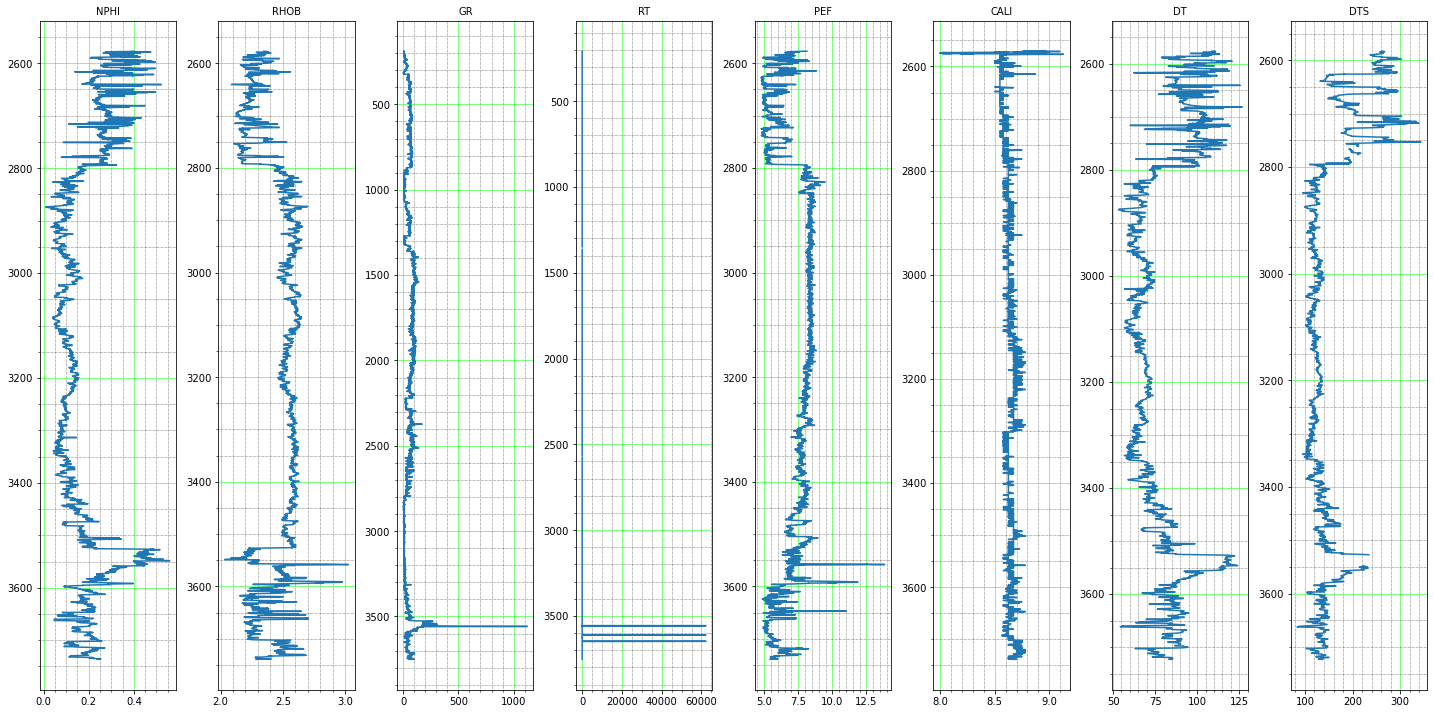

In [29]:
# Leave all by default
column_list = ['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI', 'DT', 'DTS']   

well_log_display(well, 'DEPTH', column_list)

C:\Users\Abhi\well_log_display.py:147: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(tight_layout)


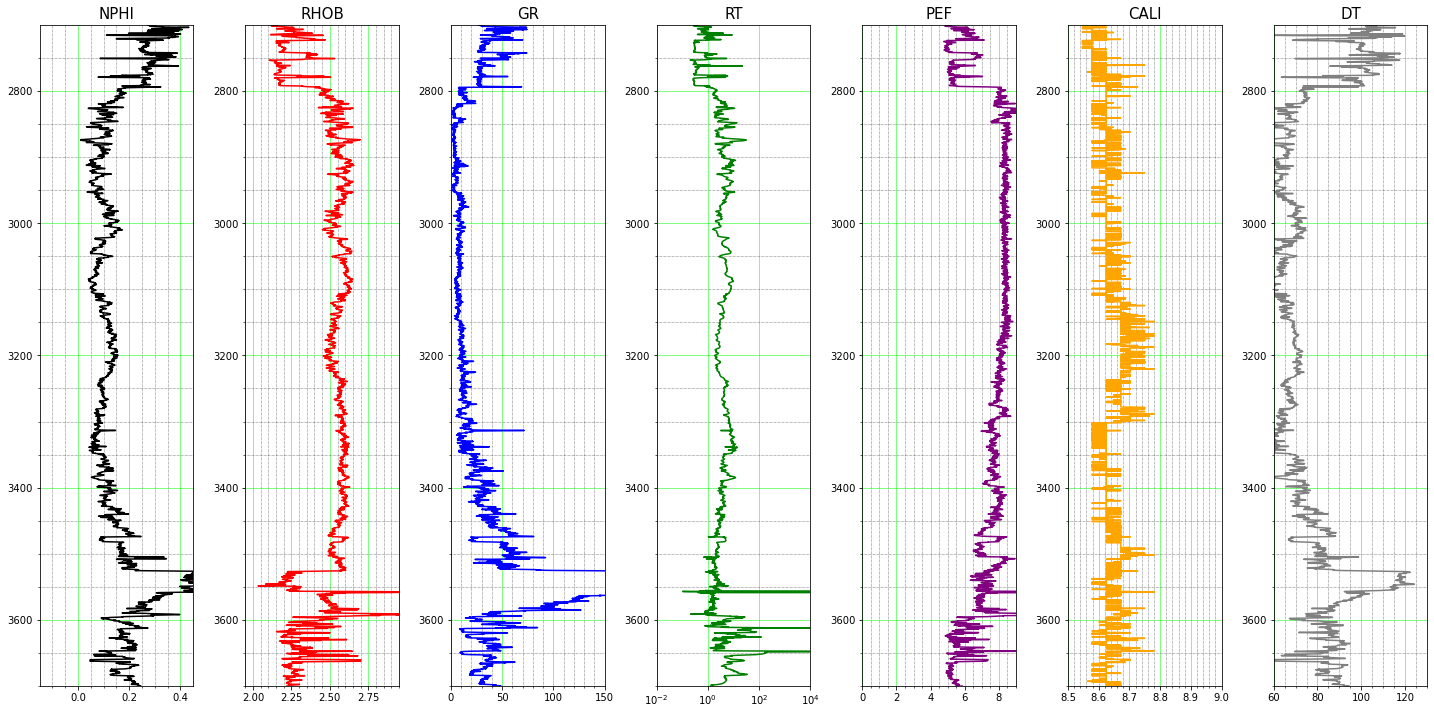

In [30]:
column_list = ['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI', 'DT']
colors      = ['black', 'red', 'blue', 'green', 'purple', 'orange', 'grey']
column_min  = [-0.15, 1.95, 0, 0.01, 0, 8.5, 60]
column_max  = [0.45, 2.95, 150, 10000, 9, 9, 130]     

well_log_display(well, 'DEPTH', column_list, 
                 column_semilog=3, column_min=column_min,column_max=column_max, 
                 min_depth=2700, max_depth=3700, colors=colors, title_size=15)

C:\Users\Abhi\AppData\Local\Temp/ipykernel_5460/2219398170.py:21: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1)


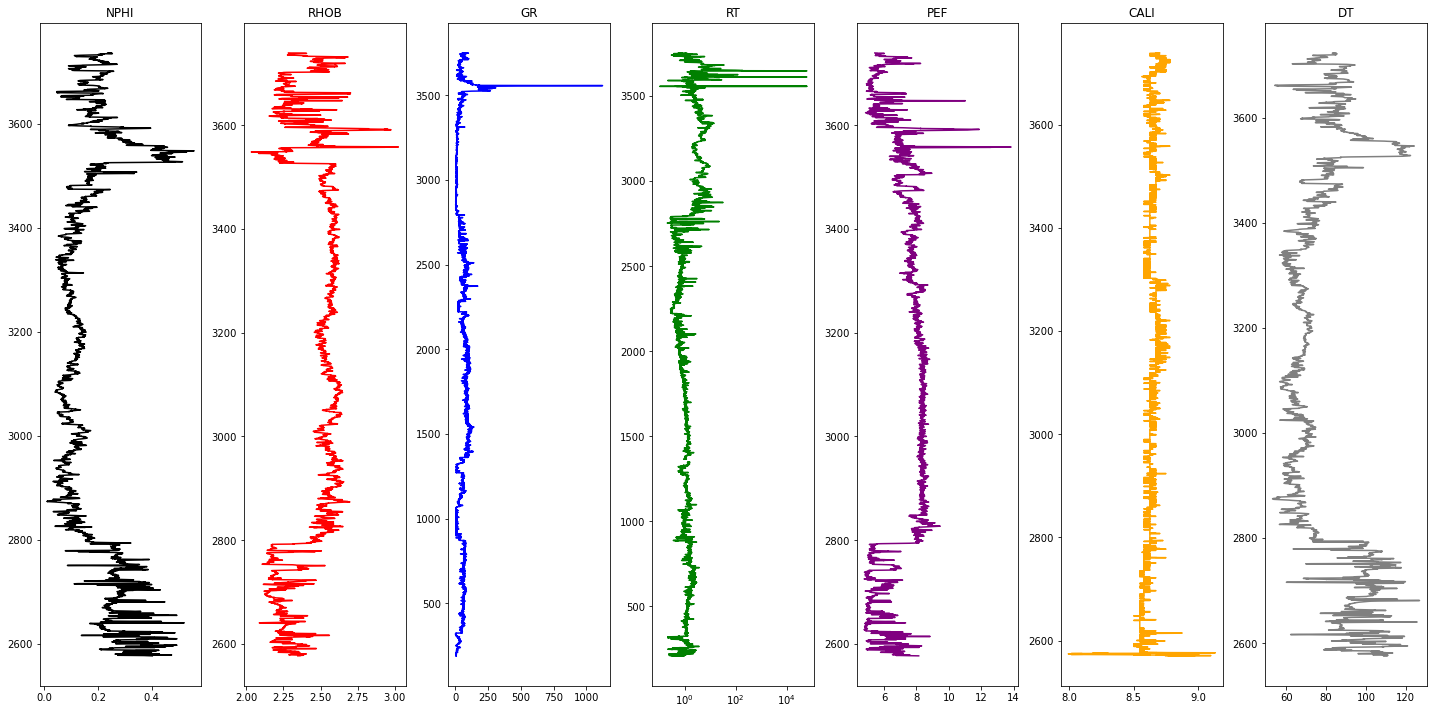

In [31]:
# define what logs are we going to use: NPHI, RHOB, GR, RT, PEF, CALI, DT
logs = ['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI', 'DT']

# create the subplots; ncols equals the number of logs
fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,10))

# looping each log to display in the subplots

colors = ['black', 'red', 'blue', 'green', 'purple', 'orange', 'grey']

for i in range(len(logs)):
  if i == 3:
    # for resistivity, semilog plot
    ax[i].semilogx(well[logs[i]], well['DEPTH'], color=colors[i])
  else:
    # for non-resistivity, normal plot
    ax[i].plot(well[logs[i]], well['DEPTH'], color=colors[i])
  
  ax[i].set_title(logs[i])

plt.tight_layout(1)
plt.show()

In [73]:

filepath = '15_9-F-11A_Labeled.csv'

# use Pandas to read CSV
df = pd.read_csv(filepath)
df

,DEPTH,NPHI,RHOB,GR,RT,PEF,CALI,DT,FM. LABEL
0,2600.0,0.371,2.356,82.748,1.323,7.126,8.648,104.605,HORDALAND GP. Top
1,2600.1,0.341,2.338,79.399,1.196,6.654,8.578,103.827,HORDALAND GP. Top
2,2600.2,0.308,2.315,74.248,1.171,6.105,8.578,102.740,HORDALAND GP. Top
3,2600.3,0.283,2.291,68.542,1.142,5.613,8.547,100.943,HORDALAND GP. Top
4,2600.4,0.272,2.269,60.314,1.107,5.281,8.523,98.473,HORDALAND GP. Top
...,...,...,...,...,...,...,...,...,...
11196,3719.6,0.236,2.617,70.191,1.627,7.438,8.703,84.800,Sleipner Fm. Top
11197,3719.7,0.238,2.595,75.393,1.513,7.258,8.750,85.013,Sleipner Fm. Top
11198,3719.8,0.236,2.571,82.648,1.420,7.076,8.766,85.054,Sleipner Fm. Top
11199,3719.9,0.217,2.544,89.157,1.349,6.956,8.781,84.928,Sleipner Fm. Top


In [74]:
# list all formation labels using df.unique()
df['FM. LABEL'].unique()

array(['HORDALAND GP. Top', 'Ty Fm. Top', 'Ekofisk Fm. Top',
       'Hod Fm. Top', 'Draupne Fm. Top', 'Heather Fm. Top',
       'Heather Fm. Sand VOLVE Top', 'Hugin Fm. VOLVE Top',
       'Sleipner Fm. Top'], dtype=object)

In [75]:
help(ND_plot)

Help on function ND_plot in module ND_plot:

ND_plot(denfl, df, column_nphi, column_rhob, column_hue, color_by, figsize=(7, 7), scatter_size=50, scatter_alpha=0.5)
    Producing Neutron-Density (Cross)plot
    
    Input:
    
    denfl is your fluid density
    df is your dataframe
    column_nphi and column_rhob are the column name of your NPHI and RHOB
    column_hue is the column name that you want for the color of the points
      e.g. depth, vshale, formation labels, etc. 
    
    color_by depends on the column_hue that you're giving
      * if you're giving a continuous hue (numerical) like depth or vshale
        define color_by='continuous'
      * if you're giving a categorical hue (labels) like formation names
        define color_by='categorical'
    
    figsize, scatter_size, scatter_alpha are by default. You can also specify
      by yourselves.
    
    Output:
    
    3 lines. Blue is sandstone, black is limestone, red is dolomite
    Each line has dots representing 

In [77]:
# to find to what inputs tothe function are required
help(label_generator)

Help on function label_generator in module label_generator:

label_generator(df_well, df_tops, column_depth, label_name)
    Generate Formation (or other) Labels to Well Dataframe
    (useful for machine learning and EDA purpose)
    
    Input:
    
    df_well is your well dataframe (that originally doesn't have the intended label)
    df_tops is your label dataframe (this dataframe should ONLY have 2 columns)
      1st column is the label name (e.g. formation top names)
      2nd column is the depth of each label name
    
    column_depth is the name of depth column on your df_well dataframe
    label_name is the name of label that you want to produce (e.g. FM. LABEL)
    
    Output:
    
    df_well is your dataframe that now has the labels (e.g. FM. LABEL)



In [78]:
help(triple_combo)

Help on function triple_combo in module triple_combo:

triple_combo(df, column_depth, column_GR, column_resistivity, column_NPHI, column_RHOB, min_depth, max_depth, min_GR=0, max_GR=150, sand_GR_line=60, min_resistivity=0.01, max_resistivity=1000, color_GR='black', color_resistivity='green', color_RHOB='red', color_NPHI='blue', figsize=(6, 10), tight_layout=1, title_size=15, title_height=1.05)
    Producing Triple Combo log
    
    Input:
    
    df is your dataframe
    column_depth, column_GR, column_resistivity, column_NPHI, column_RHOB
    are column names that appear in your dataframe (originally from the LAS file)
    
    specify your depth limits; min_depth and max_depth
    
    input variables other than above are default. You can specify
    the values yourselves. 
    
    Output:
    
    Fill colors; gold (sand), lime green (non-sand), blue (water-zone), orange (HC-zone)



In [79]:
df_well=well
df_tops=tops
column_depth='DEPTH'
label_name='FM. LABEL'# name that we want to produce
well=label_generator(df_well, df_tops, column_depth, label_name)

In [80]:
well

,DEPTH,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,DTS,...,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT,FM. LABEL
0,188.5,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,188.6,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,188.7,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,188.8,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,188.9,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35730,3761.5,2.306,2.303,2.27,2.291,8.5,8.672,0.057,84.934,135.937,...,0.689,0.668,0.751,2.284,0.77,19.738,0.741,0.737,0.77,Sleipner Fm. Top
35731,3761.6,2.306,2.303,2.27,2.291,8.5,8.672,0.057,84.934,135.937,...,0.689,0.668,0.751,2.284,0.77,19.751,0.741,0.737,0.77,Sleipner Fm. Top
35732,3761.7,2.306,2.303,2.27,2.291,8.5,8.672,0.057,84.934,135.937,...,0.689,0.668,0.751,2.284,0.77,19.764,0.741,0.737,0.77,Sleipner Fm. Top
35733,3761.8,2.306,2.303,2.27,2.291,8.5,8.672,0.057,84.934,135.937,...,0.689,0.668,0.751,2.284,0.77,19.757,0.741,0.737,0.77,Sleipner Fm. Top


In [83]:
well.fillna('unknown')


,DEPTH,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,DTS,...,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT,FM. LABEL
0,188.5,unknown,unknown,unknown,unknown,36.0,unknown,unknown,unknown,unknown,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,False
1,188.6,unknown,unknown,unknown,unknown,36.0,unknown,unknown,unknown,unknown,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,False
2,188.7,unknown,unknown,unknown,unknown,36.0,unknown,unknown,unknown,unknown,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,False
3,188.8,unknown,unknown,unknown,unknown,36.0,unknown,unknown,unknown,unknown,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,False
4,188.9,unknown,unknown,unknown,unknown,36.0,unknown,unknown,unknown,unknown,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35730,3761.5,2.306,2.303,2.27,2.291,8.5,8.672,0.057,84.934,135.937,...,0.689,0.668,0.751,2.284,0.77,19.738,0.741,0.737,0.77,False
35731,3761.6,2.306,2.303,2.27,2.291,8.5,8.672,0.057,84.934,135.937,...,0.689,0.668,0.751,2.284,0.77,19.751,0.741,0.737,0.77,False
35732,3761.7,2.306,2.303,2.27,2.291,8.5,8.672,0.057,84.934,135.937,...,0.689,0.668,0.751,2.284,0.77,19.764,0.741,0.737,0.77,False
35733,3761.8,2.306,2.303,2.27,2.291,8.5,8.672,0.057,84.934,135.937,...,0.689,0.668,0.751,2.284,0.77,19.757,0.741,0.737,0.77,False


### we are seeking hydrocarbon occurence depth between 3580 to 3702 m, and for this we can use function triple_combo

C:\Users\Abhi\triple_combo.py:120: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(tight_layout)


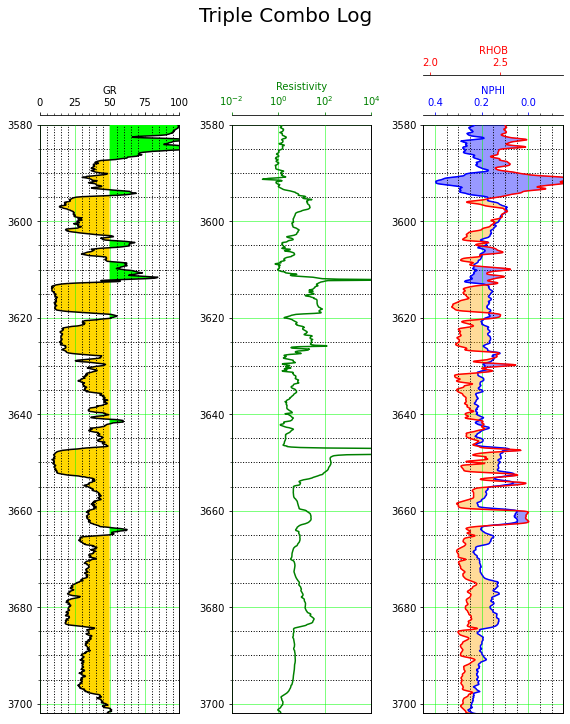

In [84]:
triple_combo(well, 'DEPTH', 'GR', 'RT', 'NPHI', 'RHOB', 
             min_depth=3580, max_depth=3702, 
             min_GR=0, max_GR=100, sand_GR_line=50,
             max_resistivity=10000,
             figsize=(8,8), title_size=20, title_height=1)